In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K' # your Foursquare ID
CLIENT_SECRET = '5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K
CLIENT_SECRET:5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO


In [3]:
address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [4]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' searching')

Restaurant searching


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K&client_secret=5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO&ll=43.653963,-79.387207&v=20180604&query=Restaurant&radius=5000&limit=100'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e57571e1e152c001b7c04a6'},
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'distance': 145,
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1582782287',
    'hasPerk': False},
   {'id': '

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1582782287,NaN
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4ae29812f964a520288f21e3,309 Spadina Ave.,CA,Toronto,Canada,btwn Dundas St. W & D'Arcy St.,896,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,"[{'label': 'display', 'lat': 43.65386562507761...",43.653866,-79.398334,NaN,M5T 2E6,ON,Swatow Restaurant 汕頭小食家,v-1582782287,NaN
2,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",False,4b266f05f964a520657b24e3,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,892,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,Goldstone Noodle Restaurant 金石,v-1582782287,NaN
3,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",False,4ad4c05cf964a520dff520e3,301 Front St W,CA,Toronto,Canada,301 Front St. W,1271,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,360 Restaurant,v-1582782287,NaN
4,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4ad4c060f964a5207ff720e3,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,Rol San Restaurant 龍笙棧,v-1582782287,NaN


In [8]:
dataframe.shape

(50, 19)

In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,CA,Toronto,Canada,btwn Dundas St. W & D'Arcy St.,896,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,"[{'label': 'display', 'lat': 43.65386562507761...",43.653866,-79.398334,NaN,M5T 2E6,ON,4ae29812f964a520288f21e3
2,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,892,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,4b266f05f964a520657b24e3
3,360 Restaurant,Wine Bar,301 Front St W,CA,Toronto,Canada,301 Front St. W,1271,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,4ad4c05cf964a520dff520e3
4,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,4ad4c060f964a5207ff720e3
5,Azure Restaurant & Bar,Restaurant,225 Front St W,CA,Toronto,Canada,in InterContinental Toronto Centre,1039,[225 Front St W (in InterContinental Toronto C...,"[{'label': 'display', 'lat': 43.64474919591934...",43.644749,-79.385113,Entertainment District,M5V 2X3,ON,4b223f5af964a520ba4424e3
6,Victor Restaurant & Bar,Bar,30 Mercer Street,CA,Toronto,Canada,at John St,979,"[30 Mercer Street (at John St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.64563436248102...",43.645634,-79.391125,NaN,M5V 1H3,ON,4ad4c05df964a5203ff620e3
7,Victoria's Restaurant,Restaurant,37 King Street East,CA,Toronto,Canada,at Le Meridien King Edward Hotel,1011,[37 King Street East (at Le Meridien King Edwa...,"[{'label': 'display', 'lat': 43.64929834396347...",43.649298,-79.376431,NaN,M5C 1E9,ON,4ad4c05cf964a52006f620e3
8,New Sky Restaurant 小沙田食家,Chinese Restaurant,353 Spadina Ave.,CA,Toronto,Canada,NaN,953,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]","[{'label': 'display', 'lat': 43.65533674412141...",43.655337,-79.398897,NaN,M5T 2G3,ON,4b074bb1f964a52077fb22e3
9,Ka Chi Korean Restaurant,Korean Restaurant,8 St Andrew St.,CA,Toronto,Canada,at Spadina Ave.,972,"[8 St Andrew St. (at Spadina Ave.), Toronto ON...","[{'label': 'display', 'lat': 43.65430655228665...",43.654307,-79.399277,NaN,M5T 1K6,ON,4ba2d00cf964a5203e1b38e3


In [10]:
dataframe_filtered.name

0                    Hemispheres Restaurant & Bistro
1                            Swatow Restaurant 汕頭小食家
2                     Goldstone Noodle Restaurant 金石
3                                     360 Restaurant
4                             Rol San Restaurant 龍笙棧
5                             Azure Restaurant & Bar
6                            Victor Restaurant & Bar
7                              Victoria's Restaurant
8                           New Sky Restaurant 小沙田食家
9                           Ka Chi Korean Restaurant
10                Some Time BBQ Grill Restaurant 碳烤屋
11                      Aroma Fine Indian Restaurant
12           Tasty's Caribbean Restaurant & Catering
13                    The Hot House Restaurant & Bar
14                North-East Chinese Restaurant 華北美食
15                Sky Dragon Chinese Restaurant 龍翔酒樓
16                     Green Tea Restaurant Downtown
17    Sassafraz | Cafe | Restaurant | Private Events
18                     Hong Shing Chinese Rest

In [11]:
Toronto_map = folium.Map(location=[43.653963, -79.387207], zoom_start=13)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Toronto_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Toronto_map)

# display map
Toronto_map

In [12]:
Toronto_map = folium.Map(location=[43.653963, -79.387207], zoom_start=15) # generate map centred around Conrad Hotel



In [13]:
dataframe_filtered.count ()

name                50
categories          50
address             50
cc                  50
city                50
country             50
crossStreet         37
distance            50
formattedAddress    50
labeledLatLngs      50
lat                 50
lng                 50
neighborhood         3
postalCode          40
state               50
id                  50
dtype: int64

In [14]:
gp = dataframe_filtered.groupby('categories')
gp

In [15]:
gp.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,CA,Toronto,Canada,btwn Dundas St. W & D'Arcy St.,896,[309 Spadina Ave. (btwn Dundas St. W & D'Arcy ...,"[{'label': 'display', 'lat': 43.65386562507761...",43.653866,-79.398334,NaN,M5T 2E6,ON,4ae29812f964a520288f21e3
2,Goldstone Noodle Restaurant 金石,Noodle House,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,892,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,4b266f05f964a520657b24e3
3,360 Restaurant,Wine Bar,301 Front St W,CA,Toronto,Canada,301 Front St. W,1271,"[301 Front St W (301 Front St. W), Toronto ON ...","[{'label': 'display', 'lat': 43.64253731714456...",43.642537,-79.387042,NaN,M5V 2T6,ON,4ad4c05cf964a520dff520e3
4,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,4ad4c060f964a5207ff720e3
5,Azure Restaurant & Bar,Restaurant,225 Front St W,CA,Toronto,Canada,in InterContinental Toronto Centre,1039,[225 Front St W (in InterContinental Toronto C...,"[{'label': 'display', 'lat': 43.64474919591934...",43.644749,-79.385113,Entertainment District,M5V 2X3,ON,4b223f5af964a520ba4424e3
6,Victor Restaurant & Bar,Bar,30 Mercer Street,CA,Toronto,Canada,at John St,979,"[30 Mercer Street (at John St), Toronto ON M5V...","[{'label': 'display', 'lat': 43.64563436248102...",43.645634,-79.391125,NaN,M5V 1H3,ON,4ad4c05df964a5203ff620e3
7,Victoria's Restaurant,Restaurant,37 King Street East,CA,Toronto,Canada,at Le Meridien King Edward Hotel,1011,[37 King Street East (at Le Meridien King Edwa...,"[{'label': 'display', 'lat': 43.64929834396347...",43.649298,-79.376431,NaN,M5C 1E9,ON,4ad4c05cf964a52006f620e3
8,New Sky Restaurant 小沙田食家,Chinese Restaurant,353 Spadina Ave.,CA,Toronto,Canada,NaN,953,"[353 Spadina Ave., Toronto ON M5T 2G3, Canada]","[{'label': 'display', 'lat': 43.65533674412141...",43.655337,-79.398897,NaN,M5T 2G3,ON,4b074bb1f964a52077fb22e3
9,Ka Chi Korean Restaurant,Korean Restaurant,8 St Andrew St.,CA,Toronto,Canada,at Spadina Ave.,972,"[8 St Andrew St. (at Spadina Ave.), Toronto ON...","[{'label': 'display', 'lat': 43.65430655228665...",43.654307,-79.399277,NaN,M5T 1K6,ON,4ba2d00cf964a5203e1b38e3


In [16]:
dataframe_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
American Restaurant,3,3,3,3,3,1,3,3,3,3,3,0,2,3,3
Bar,2,2,2,2,2,1,2,2,2,2,2,0,1,2,2
Breakfast Spot,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
Caribbean Restaurant,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Chinese Restaurant,8,8,8,8,8,5,8,8,8,8,8,0,6,8,8
Dim Sum Restaurant,4,4,4,4,4,3,4,4,4,4,4,1,2,4,4
Diner,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Event Space,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Indian Restaurant,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.0.2


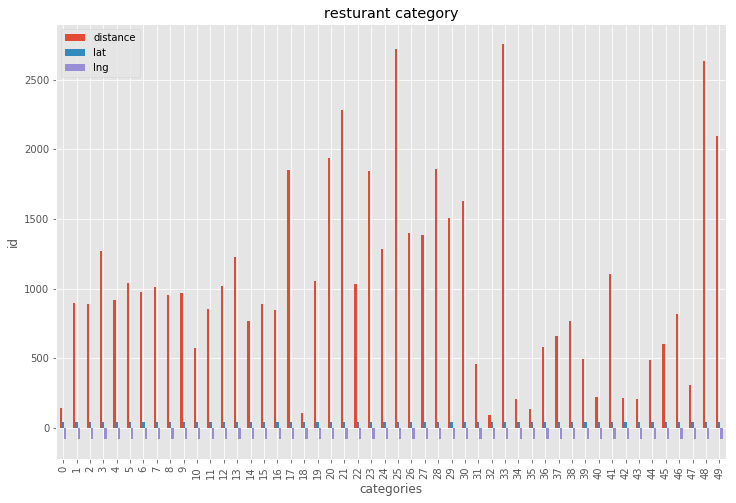

In [18]:
# step 2: plot data
dataframe_filtered.plot(kind='bar', figsize=(12, 8))

plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant category') # add title to the plot

plt.show()

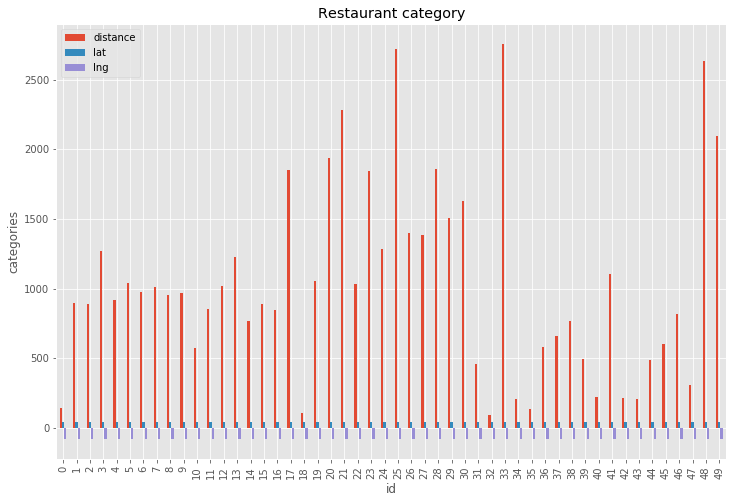

In [19]:
# step 2: plot data
dataframe_filtered.plot(kind='bar', figsize=(12, 8))

plt.xlabel('id') # add to x-label to the plot
plt.ylabel('categories') # add y-label to the plot
plt.title('Restaurant category') # add title to the plot

plt.show()

In [20]:

df=dataframe_filtered[['categories','id']]
df



,categories,id
0,American Restaurant,4ad4c05ff964a52048f720e3
1,Chinese Restaurant,4ae29812f964a520288f21e3
2,Noodle House,4b266f05f964a520657b24e3
3,Wine Bar,4ad4c05cf964a520dff520e3
4,Dim Sum Restaurant,4ad4c060f964a5207ff720e3
5,Restaurant,4b223f5af964a520ba4424e3
6,Bar,4ad4c05df964a5203ff620e3
7,Restaurant,4ad4c05cf964a52006f620e3
8,Chinese Restaurant,4b074bb1f964a52077fb22e3
9,Korean Restaurant,4ba2d00cf964a5203e1b38e3


In [21]:
df.groupby('categories').count()

,id
categories,
American Restaurant,3
Bar,2
Breakfast Spot,2
Caribbean Restaurant,1
Chinese Restaurant,8
Dim Sum Restaurant,4
Diner,1
Event Space,1
Indian Restaurant,1


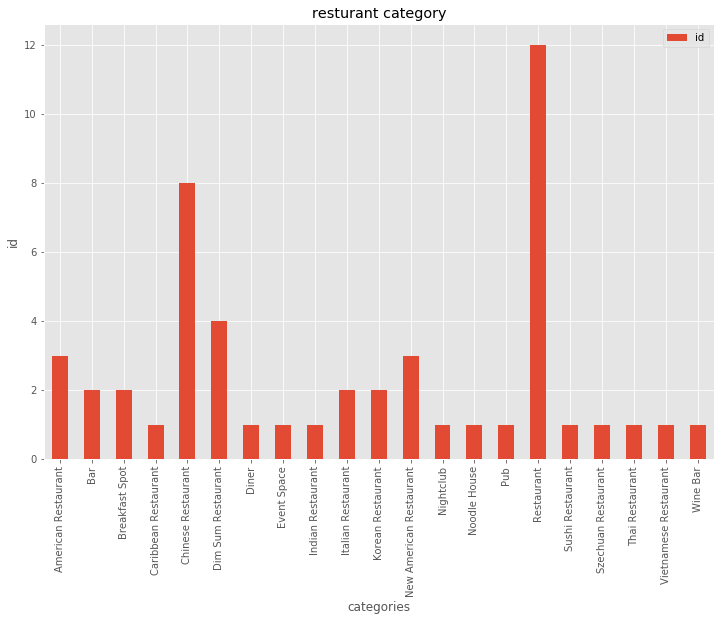

In [22]:
# step 2: plot data

df.groupby('categories').count().plot(kind='bar', figsize=(12, 8))
plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant category') # add title to the plot
plt.show()
